<center><h1> Working with Metabolomics Data
<center><h6> Aditya Subramanian

**Dataset** : https://www.ebi.ac.uk/metabolights/editor/MTBLS6739/protocols

In [10]:
#fundamental imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#imports for UMAP
import umap
import umap.plot

#imports for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#imports for random forest
from sklearn.ensemble import RandomForestClassifier

#imports for lgmb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [11]:
#settings
sns.set_theme(style = 'white', context = 'notebook', rc = {'figure.figsize':(14,10)})

In [12]:
#read in csv and set target
df_features = pd.read_csv("../Datasets/m_MTBLS6739_LCxLC-MS_pos_metabolite_profiling_v2_maf.tsv", sep = "\t")

<center><h1> Preprocessing

In [13]:
#remove unnecessary columns from features
df_features = df_features.drop(columns = df_features.columns[5:22])
df_features = df_features.drop(columns = df_features.columns[0:4])

#set target
df_target = df_features.iloc[0]
df_target = df_target.drop(df_target.index[0])

#transpose target
df_target = df_target.transpose()
df_target = df_target.map({'TRUE': 1, 'FALSE': 0})

#remove target from features
df_features = df_features.drop(df_features.index[0])

#transpose and set metabolites to column headers in features
df_features = df_features.transpose()
df_features.columns = df_features.iloc[0]
df_features = df_features.drop(df_features.index[0])

#remove duplicate columns in features
df_features = df_features.loc[:, ~df_features.columns.duplicated()].copy()

#cast objects to float
df_features = df_features.astype(float)
df_target = df_target.astype(float)

In [14]:
df_features.head()

metabolite_identification,Sulfocysteine,Taurine,Pyroglutamic Acid,Aspartic Acid,Hydroxyproline,Asparagine,Serine,Glutamine,Glutamic Acid,Sarcosine,...,Isoleucine,Leucine,Phenylalanine,Tryptophan,Ornithine,1-Methylhistidine,3-Methylhistidine,Histidine,Lysine,Arginine
plasma_crp_01,3.491482,203.599790,192710.4624,98.923870,51.361755,65.156375,357.233820,163.285809,875.795669,7.692426,...,265.713245,445.443710,309.443563,99.463594,232.181430,7.836114,80.653840,142.612945,672.357351,541.822960
plasma_crp_02,5.191624,52.832181,243181.8471,27.061255,12.231066,79.314477,216.649719,402.460486,547.281112,2.351550,...,315.298642,966.908365,287.715350,151.098759,122.992801,4.674881,59.574964,201.485916,625.336070,279.318182
plasma_crp_03,6.011404,77.654592,375235.0718,55.410885,62.166770,115.267721,306.457987,667.746118,1044.014188,6.722756,...,223.639425,533.465153,349.324636,93.289504,206.527753,3.727758,38.688733,225.972085,791.779315,405.244939
plasma_crp_04,7.544113,141.371358,230537.3596,64.640338,12.485969,23.048100,242.713621,188.655351,469.567813,3.736766,...,201.038686,326.701792,362.687686,70.074961,319.025599,1.790194,19.586817,193.779517,714.530556,331.674982
plasma_crp_06,4.803333,221.859500,641169.4088,86.717985,23.572179,65.665907,265.995606,952.744116,584.020957,2.952311,...,249.128080,432.814153,368.453408,79.919892,358.272201,5.334984,41.755196,188.502542,538.924973,276.583654


In [15]:
df_target.head()

plasma_crp_01    0.0
plasma_crp_02    0.0
plasma_crp_03    0.0
plasma_crp_04    0.0
plasma_crp_06    0.0
Name: 0, dtype: float64

<center><h1> UMAP Reduction

In [16]:
#standardize and apply umap
df_standard = StandardScaler().fit_transform(df_features)
reducer = umap.UMAP(n_components = 20, random_state = 4).fit(df_standard)

#store in embedding
embedding = reducer.transform(df_standard)

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<center><h1> Test ML Models

In [20]:
#split into test and train
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.25, random_state = 6)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(embedding, df_target, test_size = 0.25, random_state = 6)

<center><h3> Random Forest

In [21]:
#fit into decision tree
rf =  RandomForestClassifier(random_state=1)
rf = rf.fit(X_train, y_train)

rf_reduced =  RandomForestClassifier(random_state=1)
rf_reduced = rf_reduced.fit(X_train_reduced, y_train_reduced)

<center><h3> No Dimension Reduction

1.78 ms ± 31.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


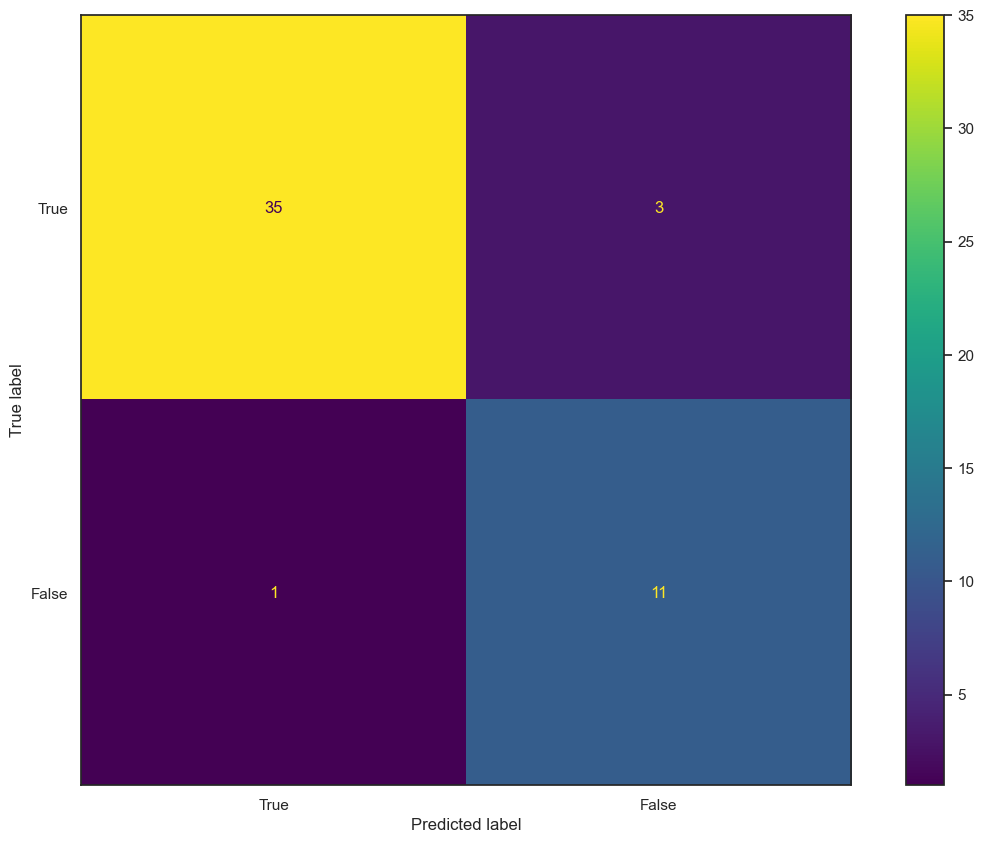

In [24]:
#separate into predicted an actual values to create confusion matrix
%timeit y_predictions = rf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['True', 'False'])

cm_display.plot()
plt.show()

In [25]:
#calculate ml metrics
accuracy = metrics.accuracy_score(y_test, y_predictions)
precision = metrics.precision_score(y_test, y_predictions, average = 'weighted')
recall = metrics.recall_score(y_test, y_predictions, average = 'weighted')
f1 = metrics.f1_score(y_test, y_predictions, average = 'weighted')

#print metrics
print({"Accuracy": accuracy,"Precision": precision,"Recall_score": recall, "F1_score": f1})

{'Accuracy': 0.92, 'Precision': 0.9274603174603174, 'Recall_score': 0.92, 'F1_score': 0.921995841995842}


<center><h3> Dimension Reduction

1.56 ms ± 29.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


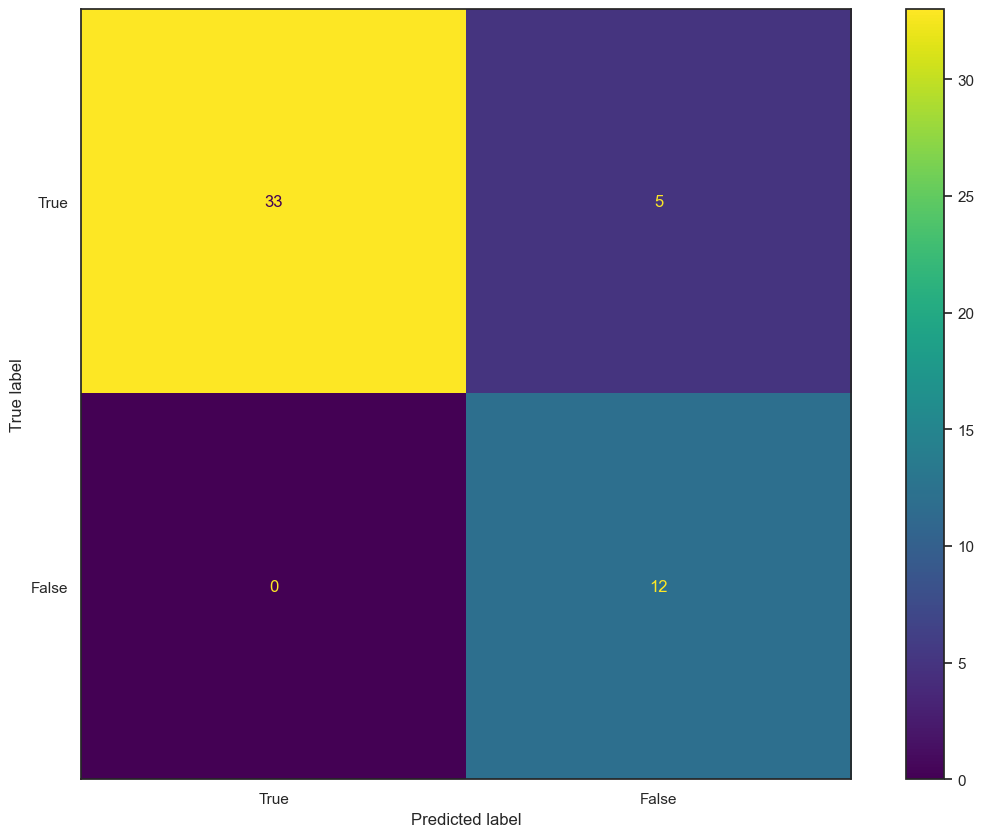

In [28]:
#separate into predicted an actual values to create confusion matrix
%timeit y_predictions_reduced = rf_reduced.predict(X_test_reduced)

confusion_matrix = metrics.confusion_matrix(y_test_reduced, y_predictions_reduced)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['True', 'False'])

cm_display.plot()
plt.show()

In [29]:
#calculate ml metrics
accuracy = metrics.accuracy_score(y_test_reduced, y_predictions_reduced)
precision = metrics.precision_score(y_test_reduced, y_predictions_reduced, average = 'weighted')
recall = metrics.recall_score(y_test_reduced, y_predictions_reduced, average = 'weighted')
f1 = metrics.f1_score(y_test_reduced, y_predictions_reduced, average = 'weighted')

#print metrics
print({"Accuracy": accuracy,"Precision": precision,"Recall_score": recall, "F1_score": f1})

{'Accuracy': 0.9, 'Precision': 0.9294117647058823, 'Recall_score': 0.9, 'F1_score': 0.905099562894609}


Neither model appears overfit. The model fit with a dimensionally reduced dataset is less accurate(0.9 vs 0.92) and also has more false positives(5 vs 3). However, it is faster as it runs in 1.56 vs 1.78. Considering their similar accuracy and false positive rate, the UMAP dimension reduction appears effective despite its faster runtime.

<center><h3> LGBM

In [234]:
pip install lightgbm

python(46210) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Note: you may need to restart the kernel to use updated packages.


In [44]:
#fit into lgbm model
lgbm = lgb.LGBMClassifier(random_state = 1)
lgbm = lgbm.fit(X_train, y_train)

lgbm_reduced = lgb.LGBMClassifier(random_state = 1)
lgbm_reduced = lgbm_reduced.fit(X_train_reduced, y_train_reduced)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 58, number of negative: 92
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Number of data points in the train set: 150, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.386667 -> initscore=-0.461346
[LightGBM] [Info] Start training from score -0.461346
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<center><h3> No Dimension Reduction

376 µs ± 31.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


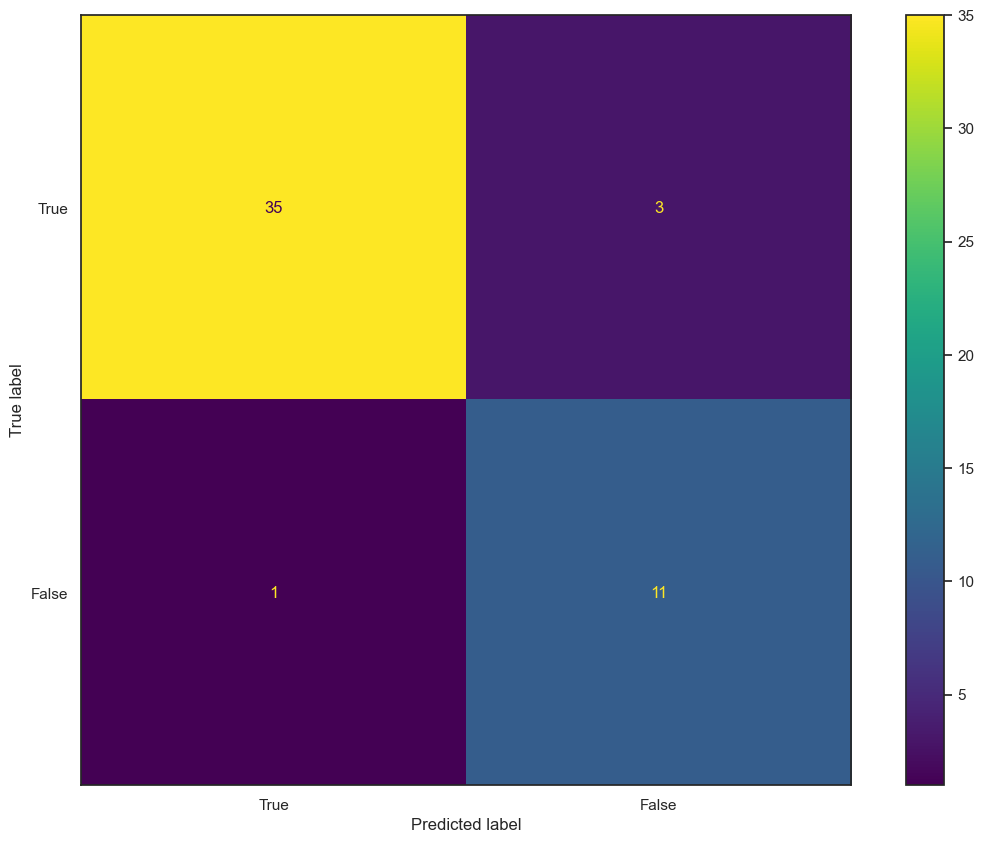

In [45]:
#separate into predicted an actual values to create confusion matrix
%timeit y_predictions = lgbm.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['True', 'False'])

cm_display.plot()
plt.show()

In [46]:
#calculate ml metrics
accuracy = metrics.accuracy_score(y_test, y_predictions)
precision = metrics.precision_score(y_test, y_predictions, average = 'weighted')
recall = metrics.recall_score(y_test, y_predictions, average = 'weighted')
f1 = metrics.f1_score(y_test, y_predictions, average = 'weighted')

#print metrics
print({"Accuracy": accuracy,"Precision": precision,"Recall_score": recall, "F1_score": f1})

{'Accuracy': 0.92, 'Precision': 0.9274603174603174, 'Recall_score': 0.92, 'F1_score': 0.921995841995842}


256 µs ± 25.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


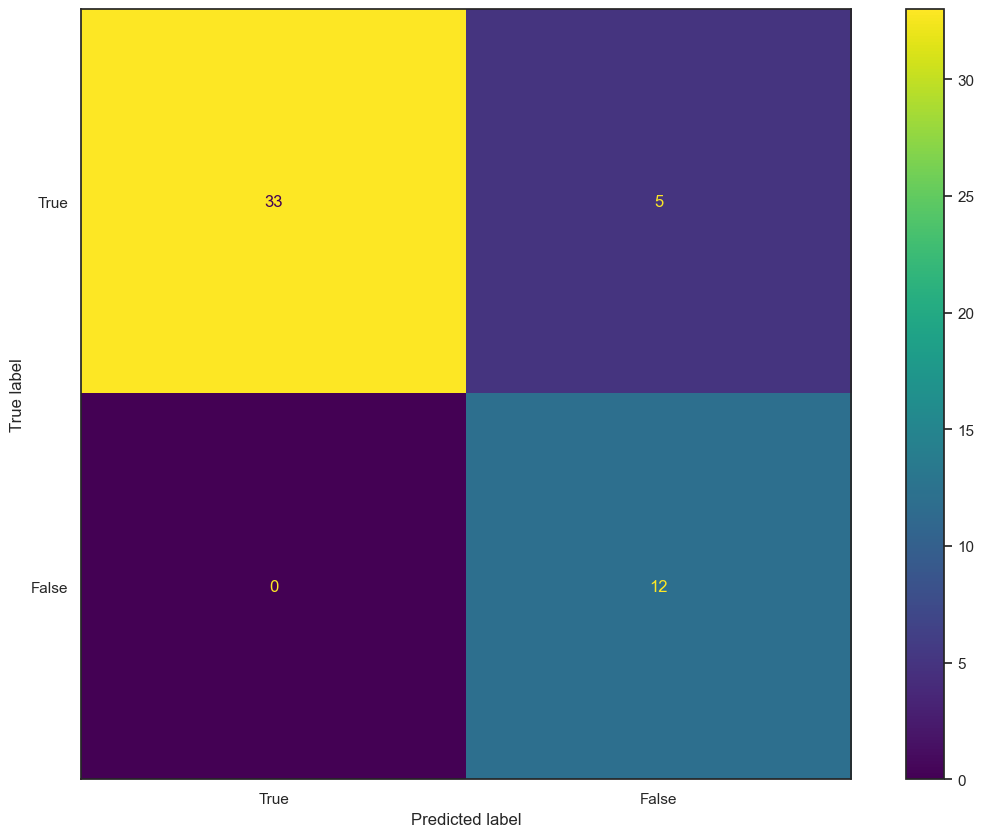

In [47]:
#separate into predicted an actual values to create confusion matrix
%timeit y_predictions_reduced = lgbm_reduced.predict(X_test_reduced)

confusion_matrix = metrics.confusion_matrix(y_test, y_predictions_reduced)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['True', 'False'])

cm_display.plot()
plt.show()

In [48]:
#calculate ml metrics
accuracy = metrics.accuracy_score(y_test_reduced, y_predictions_reduced)
precision = metrics.precision_score(y_test_reduced, y_predictions_reduced, average = 'weighted')
recall = metrics.recall_score(y_test_reduced, y_predictions_reduced, average = 'weighted')
f1 = metrics.f1_score(y_test_reduced, y_predictions_reduced, average = 'weighted')

#print metrics
print({"Accuracy": accuracy,"Precision": precision,"Recall_score": recall, "F1_score": f1})

{'Accuracy': 0.9, 'Precision': 0.9294117647058823, 'Recall_score': 0.9, 'F1_score': 0.905099562894609}
